## Importing dataset and cleaning certain columns 

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt

In [2]:
wells_df= pd.read_csv("wells_fargo_final.csv",index_col=[0])
wells_df.head()

,rating,employee_type,review,pros,cons,date,job title
0,5.0,"Current Employee, more than 1 year",Great place for work & culture,Great management\r\nPlenty of PTO\r\nTons of c...,Intense schedule sometimes due to turnover,2021-11-25,Treasury Management Sales Analyst
1,4.0,"Current Employee, more than 3 years",Pros and some Cons,"Amazing Pay and Benefits, Great Accommodations...","Training has been non-existent for many of us,...",2021-11-25,Business Initiatives Consultant III
2,5.0,Current Employee,good working environment,"Everyone is really friendly, work environment ...",can get a bit repetitive,2021-11-24,Sales Representative
3,5.0,Former Employee,Great company,great pay great hours great benefits,unfortunately laid off due to lack of funds,2021-11-24,Compliance Manager
4,5.0,Current Employee,Wells Fargo,Good work life balance- paid time off,"Too big , when you have an issue it can take d...",2021-11-24,Recruiter


In [3]:
wells_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10000
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rating         10000 non-null  float64
 1   employee_type  10000 non-null  object 
 2   review         9947 non-null   object 
 3   pros           10000 non-null  object 
 4   cons           10000 non-null  object 
 5   date           10000 non-null  object 
 6   job title      10000 non-null  object 
dtypes: float64(1), object(6)
memory usage: 625.0+ KB


In [4]:
wells_df.head()

,rating,employee_type,review,pros,cons,date,job title
0,5.0,"Current Employee, more than 1 year",Great place for work & culture,Great management\r\nPlenty of PTO\r\nTons of c...,Intense schedule sometimes due to turnover,2021-11-25,Treasury Management Sales Analyst
1,4.0,"Current Employee, more than 3 years",Pros and some Cons,"Amazing Pay and Benefits, Great Accommodations...","Training has been non-existent for many of us,...",2021-11-25,Business Initiatives Consultant III
2,5.0,Current Employee,good working environment,"Everyone is really friendly, work environment ...",can get a bit repetitive,2021-11-24,Sales Representative
3,5.0,Former Employee,Great company,great pay great hours great benefits,unfortunately laid off due to lack of funds,2021-11-24,Compliance Manager
4,5.0,Current Employee,Wells Fargo,Good work life balance- paid time off,"Too big , when you have an issue it can take d...",2021-11-24,Recruiter


#### Getting unique values in employee_type column

In [5]:
wells_df.employee_type.unique()

array(['Current Employee, more than 1 year',
       'Current Employee, more than 3 years', 'Current Employee',
       'Former Employee', 'Former Employee, more than 3 years',
       'Former Employee, more than 1 year',
       'Current Employee, less than 1 year',
       'Current Employee, more than 10 years',
       'Former Employee, more than 5 years',
       'Former Employee, less than 1 year',
       'Current Employee, more than 8 years',
       'Current Employee, more than 5 years',
       'Former Employee, more than 10 years',
       'Former Employee, more than 8 years'], dtype=object)

#### Splitting employee_type column 

In [6]:
wells_df[['employee_type', 'B']] = wells_df['employee_type'].str.split(',', 1, expand=True)

In [7]:
wells_df.head(10)

,rating,employee_type,review,pros,cons,date,job title,B
0,5.0,Current Employee,Great place for work & culture,Great management\r\nPlenty of PTO\r\nTons of c...,Intense schedule sometimes due to turnover,2021-11-25,Treasury Management Sales Analyst,more than 1 year
1,4.0,Current Employee,Pros and some Cons,"Amazing Pay and Benefits, Great Accommodations...","Training has been non-existent for many of us,...",2021-11-25,Business Initiatives Consultant III,more than 3 years
2,5.0,Current Employee,good working environment,"Everyone is really friendly, work environment ...",can get a bit repetitive,2021-11-24,Sales Representative,None
3,5.0,Former Employee,Great company,great pay great hours great benefits,unfortunately laid off due to lack of funds,2021-11-24,Compliance Manager,None
4,5.0,Current Employee,Wells Fargo,Good work life balance- paid time off,"Too big , when you have an issue it can take d...",2021-11-24,Recruiter,None
5,5.0,Former Employee,Good Bank to work for,Customer Experience is the main priority,Hard to move up within the company,2021-11-24,Lead Teller/Supervisor,more than 3 years
6,4.0,Former Employee,good,working with a lot of different people,"easy to get fired, if you mess up.",2021-11-24,Bank Teller,None
7,4.0,Current Employee,Good Team,Great teammates to work with,Restrictions for trading of stocks and derivat...,2021-11-25,Anonymous Employee,None
8,5.0,Former Employee,Teller Pay,"Fair Pay, Good Vacation, Room to Grow",Very busy all the time,2021-11-23,Teller,None
9,5.0,Former Employee,good place to work,"Good environment, all employees are friendly.",have to meet Sales quotes,2021-11-23,Personal Banker,more than 1 year


In [8]:
wells_df.employee_type.unique()

array(['Current Employee', 'Former Employee'], dtype=object)

#### Find and Drop missing values from the dataset

In [9]:
wells_df.isna().sum()

rating              0
employee_type       0
review             53
pros                0
cons                0
date                0
job title           0
B                3900
dtype: int64

In [10]:
wells_df = wells_df.drop(['B'], axis=1)

#### Converting "Date" column type to datetime 

In [11]:
wells_df['date'] = pd.to_datetime(wells_df['date'])

In [12]:
wells_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10000
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   rating         10000 non-null  float64       
 1   employee_type  10000 non-null  object        
 2   review         9947 non-null   object        
 3   pros           10000 non-null  object        
 4   cons           10000 non-null  object        
 5   date           10000 non-null  datetime64[ns]
 6   job title      10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 625.0+ KB


In [13]:
wells_df.isna().sum()

rating            0
employee_type     0
review           53
pros              0
cons              0
date              0
job title         0
dtype: int64

In [14]:
wells_df.dropna(inplace = True) 

In [15]:
wells_df.isna().sum()

rating           0
employee_type    0
review           0
pros             0
cons             0
date             0
job title        0
dtype: int64

### Conducting Exploratory data analysis

#### Plotting Distribtuion for Review Length vs Number of review

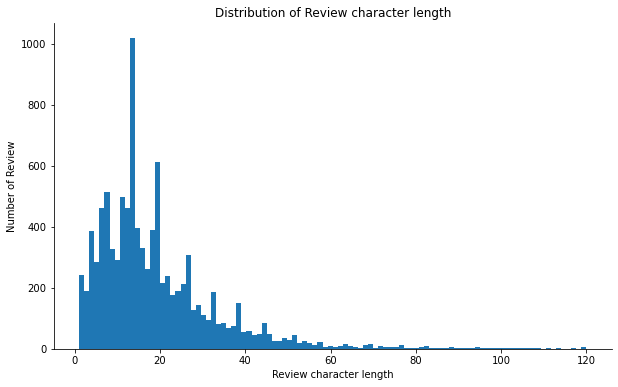

In [16]:
import seaborn as sns
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in wells_df.review]
plt.hist(doc_lens, bins = 100)
plt.title('Distribution of Review character length')
plt.ylabel('Number of Review')
plt.xlabel('Review character length')
sns.despine();

#### Plotting review rating frequency count 

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
# Product Scores

In [18]:
fig = px.histogram(wells_df, x="rating")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Rating')
fig.show()

#### Employee type vs rating 

In [19]:
px.histogram(wells_df, x="employee_type", color="rating")

#### Plot review count timeline 

In [20]:
from dateutil.parser import parse

In [21]:
wells_df['monthyear'] = pd.to_datetime(wells_df['date']).dt.to_period('M')

In [22]:
wells_df.head()

,rating,employee_type,review,pros,cons,date,job title,monthyear
0,5.0,Current Employee,Great place for work & culture,Great management\r\nPlenty of PTO\r\nTons of c...,Intense schedule sometimes due to turnover,2021-11-25,Treasury Management Sales Analyst,2021-11
1,4.0,Current Employee,Pros and some Cons,"Amazing Pay and Benefits, Great Accommodations...","Training has been non-existent for many of us,...",2021-11-25,Business Initiatives Consultant III,2021-11
2,5.0,Current Employee,good working environment,"Everyone is really friendly, work environment ...",can get a bit repetitive,2021-11-24,Sales Representative,2021-11
3,5.0,Former Employee,Great company,great pay great hours great benefits,unfortunately laid off due to lack of funds,2021-11-24,Compliance Manager,2021-11
4,5.0,Current Employee,Wells Fargo,Good work life balance- paid time off,"Too big , when you have an issue it can take d...",2021-11-24,Recruiter,2021-11


In [23]:
by_month = pd.to_datetime(wells_df['date']).dt.to_period('M').value_counts().sort_index()
by_month.index = pd.PeriodIndex(by_month.index)
df_month = by_month.rename_axis('month').reset_index(name='counts')
df_month

,month,counts
0,2018-08,1
1,2019-05,68
2,2019-06,139
3,2019-07,180
4,2019-08,176
5,2019-09,168
6,2019-10,161
7,2019-11,108
8,2019-12,123
9,2020-01,159


In [24]:
import plotly.express as px
import plotly.graph_objs as go
fig = go.Figure(data=go.Scatter(x=df_month['month'].astype(dtype=str), 
                        y=df_month['counts'],
                        marker_color='indianred', text="counts"))
fig.update_layout({"title": 'Reviews',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Total Reviews"},
                   "showlegend": False})
#fig.write_image("by-month.png",format="png", width=1000, height=600, scale=3)
fig.show()
fig.write_html("wells_time.html")

#### Plot review count by job title 

In [25]:
fig = px.histogram(wells_df, x="job title")
fig.update_traces(marker_color="orange",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Review by Job Title')
fig.show()
fig.write_html("wells_fargo.html")

### **Bank Teller, teller and Personal Banker gives the most amount of reviews as wells fargo is a financial company**

# Cleaning the textual review in Pros column 

In [26]:
## Change the reviews type to string
wells_df['clean_pro'] = wells_df['pros'].astype(str)

## Lowercase all reviews
wells_df['clean_pro'] = wells_df['clean_pro'].apply(lambda x: " ".join(x.lower() for x in x.split()))

## remove punctuation
wells_df['clean_pro'] = wells_df['clean_pro'].str.replace('[^\\w\\s]','')

# Removing numbers 
wells_df['clean_pro'] = wells_df['clean_pro'].str.replace('\\d+', '')

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_34048/1352607515.py:8: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_34048/1352607515.py:11: FutureWarning:

The default value of regex will change from True to False in a future version.



In [27]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
wells_df['clean_pro'] = wells_df['clean_pro'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

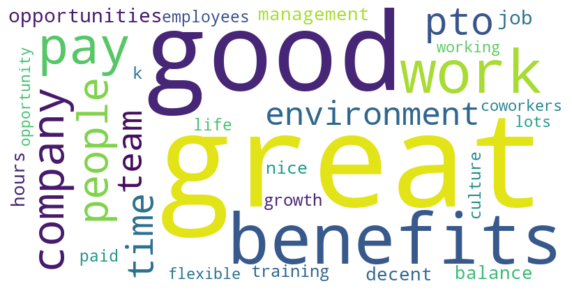

In [28]:
### Plot word cloud for the data
freq = pd.Series(' '.join(wells_df['clean_pro']).split()).value_counts()[:30]
freq_df = pd.DataFrame({'text':freq.index, 'count':freq.values})
data = freq_df.set_index('text').to_dict()['count']
from wordcloud import WordCloud
wc = WordCloud(background_color = 'white', width=800, height=400, max_words=200).generate_from_frequencies(data)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Cleaning the textual data in cons column

In [29]:
## Change the reviews type to string
wells_df['clean_cons'] = wells_df['cons'].astype(str)

## Lowercase all reviews
wells_df['clean_cons'] = wells_df['clean_cons'].apply(lambda x: " ".join(x.lower() for x in x.split()))

## remove punctuation
wells_df['clean_cons'] = wells_df['clean_cons'].str.replace('[^\\w\\s]','')

## remove numbers
wells_df['clean_cons'] = wells_df['clean_cons'].str.replace('\\d+', '')

from nltk.corpus import stopwords
stop = stopwords.words('english')
wells_df['clean_cons'] = wells_df['clean_cons'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_34048/2925560789.py:8: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_34048/2925560789.py:11: FutureWarning:

The default value of regex will change from True to False in a future version.



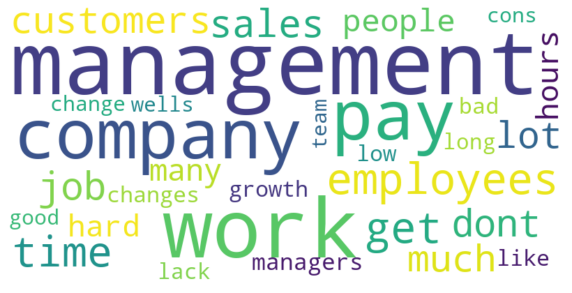

In [30]:
### Plot word cloud for the data
freq = pd.Series(' '.join(wells_df['clean_cons']).split()).value_counts()[:30]
freq_df = pd.DataFrame({'text':freq.index, 'count':freq.values})
data = freq_df.set_index('text').to_dict()['count']
from wordcloud import WordCloud
wc = WordCloud(background_color = 'white', width=800, height=400, max_words=200).generate_from_frequencies(data)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Plotting review length for each rating 

In [31]:
wells_df['review_length'] = (wells_df['pros'].str.len() + wells_df['cons'].str.len())/100

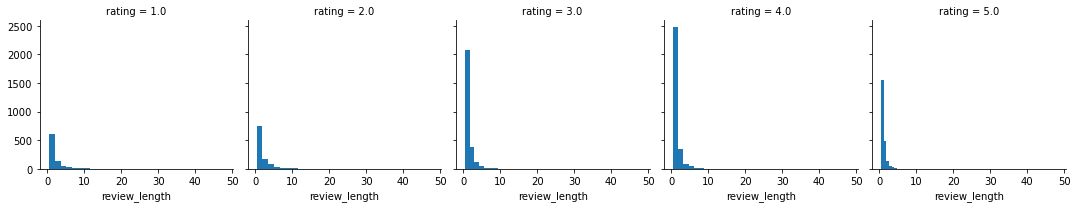

In [32]:
g = sns.FacetGrid(data=wells_df, col='rating')
g.map(plt.hist, 'review_length', bins=30)

<AxesSubplot:xlabel='rating', ylabel='review_length'>

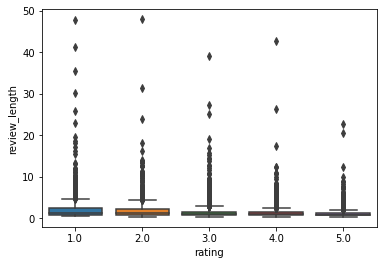

In [33]:
sns.boxplot(x='rating', y='review_length', data=wells_df)

### Perfoming LDA-Topic Modelling 

In [34]:
#warnings.filterwarnings(action='once')
warnings.filterwarnings('ignore')

In [35]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from __future__ import print_function
import pyLDAvis
import pyLDAvis.sklearn
#pyLDAvis.enable_notebook()

C:\Users\mihir\Miniconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [36]:
from sklearn.decomposition import LatentDirichletAllocation
vectorizer = CountVectorizer(
analyzer='word',       
min_df=3,# minimum required occurences of a word 
stop_words='english',# remove stop words
lowercase=True,# convert all words to lowercase
token_pattern='[a-zA-Z0-9]{3,}',# num chars > 3
max_features=5000,# max number of unique words
                            )
data_matrix = vectorizer.fit_transform(wells_df.clean_pro)
data_matrix

<9947x1574 sparse matrix of type '<class 'numpy.int64'>'
	with 55479 stored elements in Compressed Sparse Row format>

In [37]:
lda_model = LatentDirichletAllocation(
n_components=5, # Number of topics
learning_method='online',
random_state=20,       
n_jobs = -1 )
                                     
lda_output = lda_model.fit_transform(data_matrix)

In [38]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_matrix, vectorizer, mds='tsne')

C:\Users\mihir\Miniconda3\lib\site-packages\sklearn\metrics\pairwise.py:58: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\mihir\Miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:349: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\mihir\Miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:350: DeprecationWarning:


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      150.222153  -72.269554       1        1  26.779843
1       51.163364 -159.968018       2        1  22.192395
0      -73.144554   21.523815       3        1  17.595871
2      -66.410133 -110.606438       4        1  17.475408
4       54.417324   12.443444       5        1  15.956484, topic_info=          Term         Freq        Total Category  logprob  loglift
588       good  3061.000000  3061.000000  Default  30.0000  30.0000
122   benefits  3061.000000  3061.000000  Default  29.0000  29.0000
1544      work  2080.000000  2080.000000  Default  28.0000  28.0000
1003       pay  1462.000000  1462.000000  Default  27.0000  27.0000
1113       pto   829.000000   829.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
931        new    86.910447   136.755715   Topic5  -4.6627   1.3820
241    company   285.951923  1097.918844   Topic5  -3.4718   0.4900
1012    people   171.221487   935.343376   Topic5  -3.9847   0.1373
56     amazing    84.733775   178.585008   Topic5  -4.6881   1.0898
591      great    86.161433  3171.904157   Topic5  -4.6714  -1.7706

[235 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
0         4  0.990124      ability
1         3  0.986054         able
36        3  0.997876  advancement
56        2  0.520760      amazing
56        5  0.475964      amazing
...     ...       ...          ...
1551      5  0.565784      working
1552      2  0.990934     worklife
1563      4  0.995947         year
1565      4  0.995654        years
1571      5  0.987364        youre

[240 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 3, 5])

#### Getting the Top Words for each topic 

In [39]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [40]:
vectorizer = CountVectorizer(max_df=0.8, min_df=4, stop_words='english')

In [41]:
doc_term_matrix = vectorizer.fit_transform(wells_df["clean_pro"].values.astype('U'))

In [42]:
doc_term_matrix.shape

(9947, 1289)

In [43]:
LDA = LatentDirichletAllocation(n_components=5, random_state=35)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=35)

In [44]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['environment', 'life', 'training', 'benefits', 'nice', 'balance', 'people', 'good', 'great', 'work']


Top 10 words for topic #1:
['flexible', 'company', 'hours', 'decent', 'work', 'pto', 'pay', 'great', 'good', 'benefits']


Top 10 words for topic #2:
['vacation', 'fargo', 'good', 'holidays', 'wells', 'benefits', 'paid', 'employees', 'job', 'time']


Top 10 words for topic #3:
['leave', 'customers', 'members', 'customer', 'benefits', 'home', 'working', 'work', 'team', 'great']


Top 10 words for topic #4:
['grow', 'benefits', 'advancement', 'good', 'career', 'company', 'opportunity', 'lots', 'growth', 'opportunities']




In [45]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Sentiment Analysis 

###  Using NRCLex library to classify emotions

In [46]:
#!pip install NRCLex

In [47]:
from nrclex import NRCLex
str_tweet = ",".join(wells_df["review"])
text_object = NRCLex(str_tweet)

In [48]:
data = text_object.raw_emotion_scores

In [49]:
data

{'positive': 2341,
 'anticipation': 1128,
 'joy': 812,
 'surprise': 502,
 'trust': 1364,
 'fear': 334,
 'negative': 497,
 'sadness': 267,
 'anger': 265,
 'disgust': 209}

In [50]:
emotion_df = pd.DataFrame.from_dict(data, orient='index')
emotion_df = emotion_df.reset_index()
emotion_df = emotion_df.rename(columns={'index' : 'Emotion Classification' , 0: 'Emotion Count'})
emotion_df = emotion_df.sort_values(by=['Emotion Count'], ascending=False)
import plotly.express as px
fig = px.bar(emotion_df, x='Emotion Count', y='Emotion Classification', color = 'Emotion Classification', orientation='h', width = 800, height = 400)
fig.write_html("emotion.html")
fig.show()

In [51]:
#text_object.affect_dict

In [52]:
n1 = text_object.affect_frequencies

In [53]:
n1

{'fear': 0.04326985360798031,
 'anger': 0.03433087187459515,
 'anticip': 0.0,
 'trust': 0.17670682730923695,
 'surprise': 0.0650343308718746,
 'positive': 0.30327762663557456,
 'negative': 0.06438657857235393,
 'sadness': 0.03458997279440342,
 'disgust': 0.027076046119963726,
 'joy': 0.10519497344215573,
 'anticipation': 0.14613291877186163}

In [54]:
type(n1)

dict

In [55]:
emotion_df = pd.DataFrame.from_dict(n1, orient='index')
emotion_df = emotion_df.reset_index()
emotion_df = emotion_df.rename(columns={'index' : 'Emotion Classification' , 0: 'Emotion Freq'})
emotion_df = emotion_df.sort_values(by=['Emotion Freq'], ascending=False)
import plotly.express as px
fig = px.bar(emotion_df, x='Emotion Freq', y='Emotion Classification', color = 'Emotion Freq', orientation='h',color_continuous_scale='Bluered_r', width = 800, height = 400)
fig.write_html("emotion2.html")
fig.show()

In [56]:
## topic analysis
## 4 sentiment happy sas angry and glad
# visualisations
# name entitiy recognitions
# create a classification model for data 

In [57]:
wells_df = wells_df.drop(['clean_pro'], axis=1)

In [58]:
wells_df.head()

,rating,employee_type,review,pros,cons,date,job title,monthyear,clean_cons,review_length
0,5.0,Current Employee,Great place for work & culture,Great management\r\nPlenty of PTO\r\nTons of c...,Intense schedule sometimes due to turnover,2021-11-25,Treasury Management Sales Analyst,2021-11,intense schedule sometimes due turnover,1.15
1,4.0,Current Employee,Pros and some Cons,"Amazing Pay and Benefits, Great Accommodations...","Training has been non-existent for many of us,...",2021-11-25,Business Initiatives Consultant III,2021-11,training nonexistent many us computer based tr...,7.96
2,5.0,Current Employee,good working environment,"Everyone is really friendly, work environment ...",can get a bit repetitive,2021-11-24,Sales Representative,2021-11,get bit repetitive,0.78
3,5.0,Former Employee,Great company,great pay great hours great benefits,unfortunately laid off due to lack of funds,2021-11-24,Compliance Manager,2021-11,unfortunately laid due lack funds,0.79
4,5.0,Current Employee,Wells Fargo,Good work life balance- paid time off,"Too big , when you have an issue it can take d...",2021-11-24,Recruiter,2021-11,big issue take days fix,0.93


### N-gram Implementation

In [59]:
import re
import unicodedata
import nltk
from nltk.corpus import stopwords

In [60]:
### Text cleaning
def quick_clean(text):
  lemma = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [lemma.lemmatize(word) for word in words if word not in stopwords]

In [61]:
words = quick_clean(''.join(str(wells_df['review'].tolist())))

In [62]:
words[:10]

['great',
 'place',
 'work',
 'culture',
 'pro',
 'con',
 'good',
 'working',
 'environment',
 'great']

In [63]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]

(great, company)    537
(place, work)       507
(well, fargo)       413
(good, company)     366
(great, place)      307
(good, place)       218
(company, work)     211
(company, great)    189
(work, great)       173
(great, benefit)    159
dtype: int64

In [64]:
new_bigrams = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]
new_trigrams = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]

In [65]:
b1 = pd.DataFrame({'bigrams':new_bigrams.index, 'values':new_bigrams.values})
t1 = pd.DataFrame({'trigrams':new_trigrams.index, 'values':new_trigrams.values})

<AxesSubplot:xlabel='values', ylabel='bigrams'>

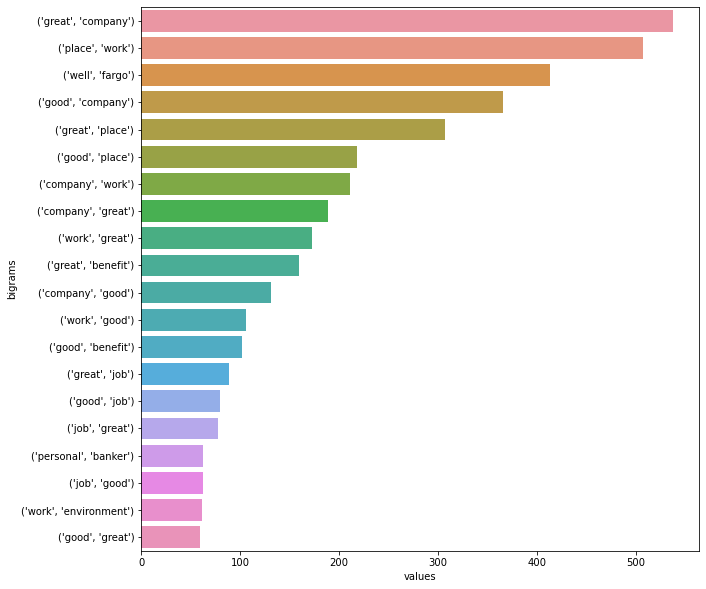

In [66]:
f, ax = plt.subplots(figsize = (10,10))
sns.barplot(x = 'values',y = 'bigrams',data = b1, orient = 'h')

<AxesSubplot:xlabel='values', ylabel='trigrams'>

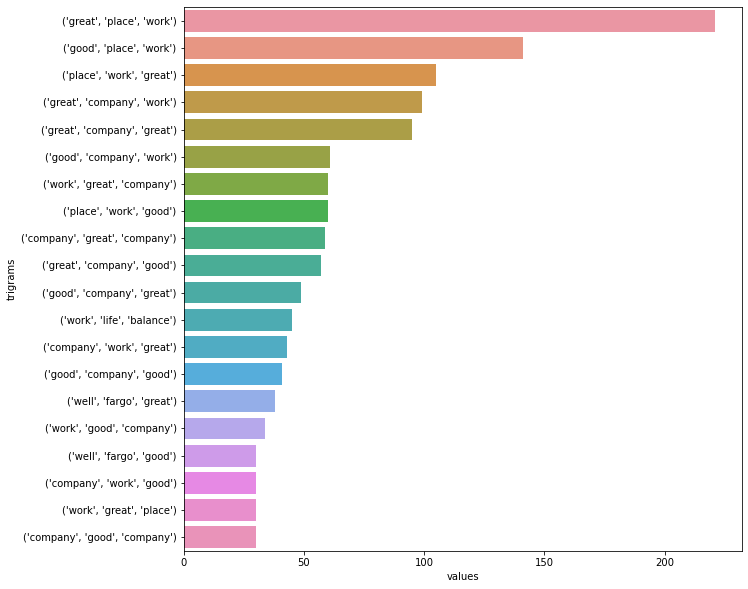

In [67]:
f, ax = plt.subplots(figsize = (10,10))
sns.barplot(x = 'values',y = 'trigrams',data = t1, orient = 'h')

### Name Entity recognition

In [68]:
import spacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [69]:
tokens = nlp(''.join(str(wells_df.review.tolist())))

In [70]:
items = [x.text for x in tokens.ents]
Counter(items).most_common(20)

[("Wells Fargo'", 193),
 ('Teller', 122),
 ('Review', 96),
 ('Wells Fargo', 67),
 ("Wells'", 56),
 ('Love', 38),
 ('Wells', 35),
 ('Awesome', 25),
 ('first', 12),
 ("WF'", 12),
 ("Wells Fargo Review'", 11),
 ("Pros and Cons'", 10),
 ('WF', 10),
 ('Career', 7),
 ('Great Benefits', 7),
 ("Lead Teller'", 6),
 ('Pros', 6),
 ('Toxic', 6),
 ('Overworked', 6),
 ("Wells Fargo Teller'", 6)]

In [71]:
org_list = []
for ent in tokens.ents:
    if ent.label_ == 'ORG':
        org_list.append(ent.text)
        
org_counts = Counter(org_list).most_common(20)
df_org = pd.DataFrame(org_counts, columns =['text', 'count'])

In [72]:
df_org

,text,count
0,Wells Fargo',193
1,Wells Fargo,67
2,Wells',56
3,Wells,35
4,Awesome,25
5,WF',12
6,Wells Fargo Review',11
7,WF,10
8,Wells Fargo Teller',6
9,Wells Fargo Personal Banker',5


In [73]:
fig = px.bar(df_org, x='text', y='count')
fig.show()

## Emotion Classification and Word Cloud generation for each emotion

In [74]:
import text2emotion as te

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mihir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mihir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mihir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [75]:
wells_df['emotion'] = wells_df['review'].apply(lambda x:te.get_emotion(x))

In [76]:
wells_df.head(10)

,rating,employee_type,review,pros,cons,date,job title,monthyear,clean_cons,review_length,emotion
0,5.0,Current Employee,Great place for work & culture,Great management\r\nPlenty of PTO\r\nTons of c...,Intense schedule sometimes due to turnover,2021-11-25,Treasury Management Sales Analyst,2021-11,intense schedule sometimes due turnover,1.15,"{'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.0,..."
1,4.0,Current Employee,Pros and some Cons,"Amazing Pay and Benefits, Great Accommodations...","Training has been non-existent for many of us,...",2021-11-25,Business Initiatives Consultant III,2021-11,training nonexistent many us computer based tr...,7.96,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':..."
2,5.0,Current Employee,good working environment,"Everyone is really friendly, work environment ...",can get a bit repetitive,2021-11-24,Sales Representative,2021-11,get bit repetitive,0.78,"{'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.0,..."
3,5.0,Former Employee,Great company,great pay great hours great benefits,unfortunately laid off due to lack of funds,2021-11-24,Compliance Manager,2021-11,unfortunately laid due lack funds,0.79,"{'Happy': 1.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
4,5.0,Current Employee,Wells Fargo,Good work life balance- paid time off,"Too big , when you have an issue it can take d...",2021-11-24,Recruiter,2021-11,big issue take days fix,0.93,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':..."
5,5.0,Former Employee,Good Bank to work for,Customer Experience is the main priority,Hard to move up within the company,2021-11-24,Lead Teller/Supervisor,2021-11,hard move within company,0.74,"{'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.0,..."
6,4.0,Former Employee,good,working with a lot of different people,"easy to get fired, if you mess up.",2021-11-24,Bank Teller,2021-11,easy get fired mess,0.72,"{'Happy': 1.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
7,4.0,Current Employee,Good Team,Great teammates to work with,Restrictions for trading of stocks and derivat...,2021-11-25,Anonymous Employee,2021-11,restrictions trading stocks derivatives,0.78,"{'Happy': 1.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
8,5.0,Former Employee,Teller Pay,"Fair Pay, Good Vacation, Room to Grow",Very busy all the time,2021-11-23,Teller,2021-11,busy time,0.59,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':..."
9,5.0,Former Employee,good place to work,"Good environment, all employees are friendly.",have to meet Sales quotes,2021-11-23,Personal Banker,2021-11,meet sales quotes,0.70,"{'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.0,..."


In [77]:
wells_df['final_emotion'] = wells_df['emotion'].apply(lambda x: max(x, key=x.get))

In [78]:
wells_df.head(10)

,rating,employee_type,review,pros,cons,date,job title,monthyear,clean_cons,review_length,emotion,final_emotion
0,5.0,Current Employee,Great place for work & culture,Great management\r\nPlenty of PTO\r\nTons of c...,Intense schedule sometimes due to turnover,2021-11-25,Treasury Management Sales Analyst,2021-11,intense schedule sometimes due turnover,1.15,"{'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.0,...",Fear
1,4.0,Current Employee,Pros and some Cons,"Amazing Pay and Benefits, Great Accommodations...","Training has been non-existent for many of us,...",2021-11-25,Business Initiatives Consultant III,2021-11,training nonexistent many us computer based tr...,7.96,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",Happy
2,5.0,Current Employee,good working environment,"Everyone is really friendly, work environment ...",can get a bit repetitive,2021-11-24,Sales Representative,2021-11,get bit repetitive,0.78,"{'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.0,...",Fear
3,5.0,Former Employee,Great company,great pay great hours great benefits,unfortunately laid off due to lack of funds,2021-11-24,Compliance Manager,2021-11,unfortunately laid due lack funds,0.79,"{'Happy': 1.0, 'Angry': 0.0, 'Surprise': 0.0, ...",Happy
4,5.0,Current Employee,Wells Fargo,Good work life balance- paid time off,"Too big , when you have an issue it can take d...",2021-11-24,Recruiter,2021-11,big issue take days fix,0.93,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",Happy
5,5.0,Former Employee,Good Bank to work for,Customer Experience is the main priority,Hard to move up within the company,2021-11-24,Lead Teller/Supervisor,2021-11,hard move within company,0.74,"{'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.0,...",Fear
6,4.0,Former Employee,good,working with a lot of different people,"easy to get fired, if you mess up.",2021-11-24,Bank Teller,2021-11,easy get fired mess,0.72,"{'Happy': 1.0, 'Angry': 0.0, 'Surprise': 0.0, ...",Happy
7,4.0,Current Employee,Good Team,Great teammates to work with,Restrictions for trading of stocks and derivat...,2021-11-25,Anonymous Employee,2021-11,restrictions trading stocks derivatives,0.78,"{'Happy': 1.0, 'Angry': 0.0, 'Surprise': 0.0, ...",Happy
8,5.0,Former Employee,Teller Pay,"Fair Pay, Good Vacation, Room to Grow",Very busy all the time,2021-11-23,Teller,2021-11,busy time,0.59,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",Happy
9,5.0,Former Employee,good place to work,"Good environment, all employees are friendly.",have to meet Sales quotes,2021-11-23,Personal Banker,2021-11,meet sales quotes,0.70,"{'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.0,...",Fear


In [79]:
wells_df['final_emotion'].value_counts()

Happy       6473
Fear        2228
Surprise     607
Sad          508
Angry        131
Name: final_emotion, dtype: int64

In [80]:
Happy_df = wells_df[wells_df["final_emotion"] == 'Happy']
Sad_df = wells_df[wells_df["final_emotion"] == 'Sad']
Fear_df = wells_df[wells_df["final_emotion"] == 'Fear']
Surprise_df = wells_df[wells_df["final_emotion"] == 'Surprise']

### Word cloud for Happy Emotion

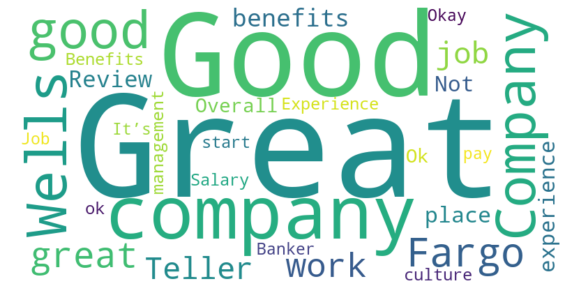

In [81]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
Happy_df['review'] = Happy_df['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

freq = pd.Series(' '.join(Happy_df['review']).split()).value_counts()[:30]
freq_df = pd.DataFrame({'text':freq.index, 'count':freq.values})
data = freq_df.set_index('text').to_dict()['count']
from wordcloud import WordCloud
wc = WordCloud(background_color = 'white', width=800, height=400, max_words=200).generate_from_frequencies(data)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Word cloud for Sad Emotion

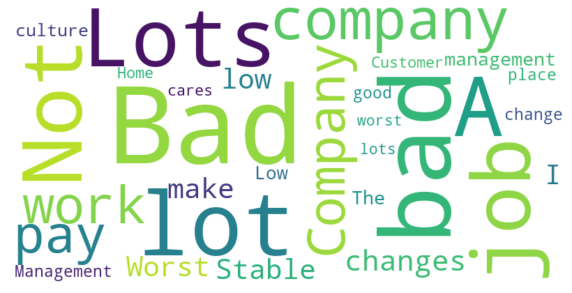

In [82]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
Sad_df['review'] = Sad_df['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

freq = pd.Series(' '.join(Sad_df['review']).split()).value_counts()[:30]
freq_df = pd.DataFrame({'text':freq.index, 'count':freq.values})
data = freq_df.set_index('text').to_dict()['count']
from wordcloud import WordCloud
wc = WordCloud(background_color = 'white', width=800, height=400, max_words=200).generate_from_frequencies(data)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Word cloud for Fear Emotion

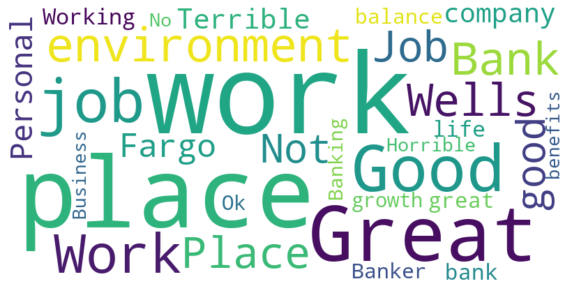

In [83]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
Fear_df['review'] = Fear_df['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

freq = pd.Series(' '.join(Fear_df['review']).split()).value_counts()[:30]
freq_df = pd.DataFrame({'text':freq.index, 'count':freq.values})
data = freq_df.set_index('text').to_dict()['count']
from wordcloud import WordCloud
wc = WordCloud(background_color = 'white', width=800, height=400, max_words=200).generate_from_frequencies(data)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Word cloud for Surprise Emotion

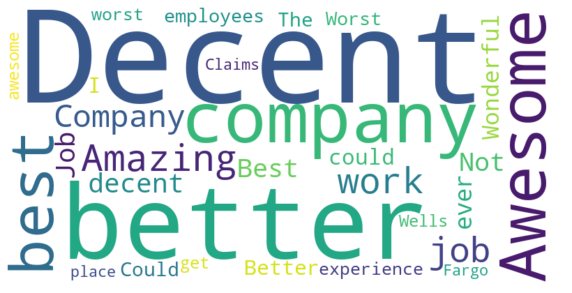

In [84]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
Surprise_df['review'] = Surprise_df['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

freq = pd.Series(' '.join(Surprise_df['review']).split()).value_counts()[:30]
freq_df = pd.DataFrame({'text':freq.index, 'count':freq.values})
data = freq_df.set_index('text').to_dict()['count']
from wordcloud import WordCloud
wc = WordCloud(background_color = 'white', width=800, height=400, max_words=200).generate_from_frequencies(data)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()